# Overview of datasets

In [1]:
import numpy as np
import scanpy as sc
import pertpy as pt
import pandas as pd

from utils import scanpy_setup

sc.set_figure_params(dpi=100, frameon=False, facecolor=None)

Global seed set to 0
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
/usr/local/lib/python3.8/dist-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.


ryp2 is not installed. Install with pip install rpy2 to run tools with R support.

To use sccoda or tasccoda please install ete3 with pip install ete3

In [54]:
def plot(adata, groupby):
    adata.obs[groupby] = adata.obs[groupby].astype('category')
    sc.pl.umap(adata, color=[groupby], palette='viridis')
    sc.pl.umap(adata, color='perturbation', groups=['control'], palette='twilight_shifted', na_in_legend=False, title='control')

## sciplex

In [56]:
def process_sciplex(adata, cell_line):
    if cell_line == 'A549':  # two doses in here, we only want the 24hr                                                                                                                                                                                     
        adata = adata[adata.obs.time == 24]

    adata = adata[adata.obs.cell_line == cell_line]
    sc.pp.filter_genes(adata, min_cells=100)
    sc.pp.filter_cells(adata, min_genes=200)

    # separate out the perturbations by dose                                                                                                                                                                                                                
    adata.obs['perturbation_name'] = adata.obs.perturbation.values
    adata.obs['perturbation'] = adata.obs['perturbation_name'].astype(str) + '_' + adata.obs.dose_value.astype(str)
    adata.obs['perturbation'] = adata.obs['perturbation'].replace({'control_0.0':'control'})

    adata.obs['log10(dose_value)'] = np.log10(adata.obs['dose_value'])
    return adata

In [3]:
cell_line = 'K562'
adata = pt.data.srivatsan_2020_sciplex3()
adata = process_sciplex(adata, cell_line)

In [5]:
%%time
scanpy_setup(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

CPU times: user 6min 25s, sys: 2min 34s, total: 8min 59s
Wall time: 4min 11s


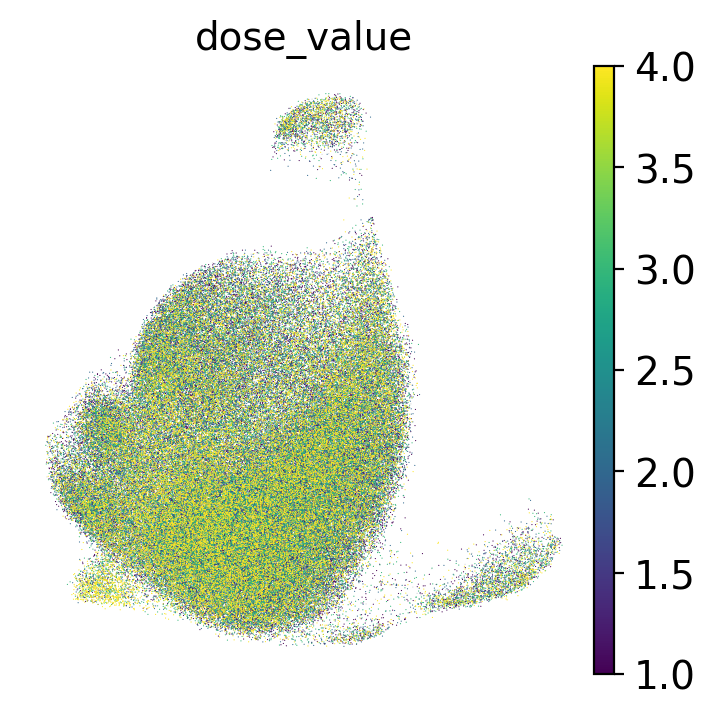

In [10]:
plot(adata, 'dose_value')

In [40]:
cell_line = 'A549'
adata = pt.data.srivatsan_2020_sciplex3()
adata = process_sciplex(adata, cell_line)

In [41]:
%%time
scanpy_setup(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

CPU times: user 6min 24s, sys: 4min 3s, total: 10min 27s
Wall time: 2min 32s


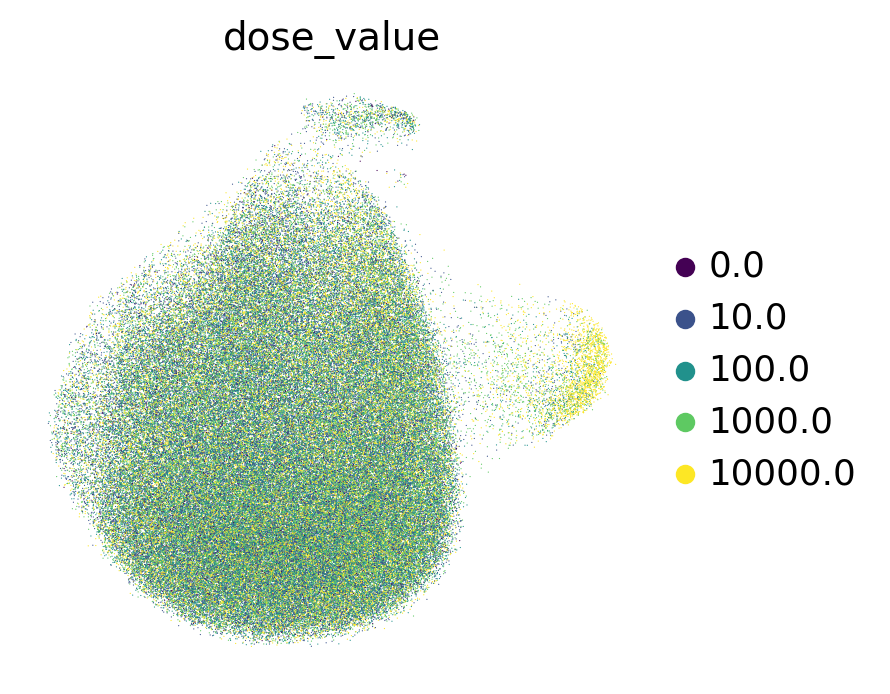

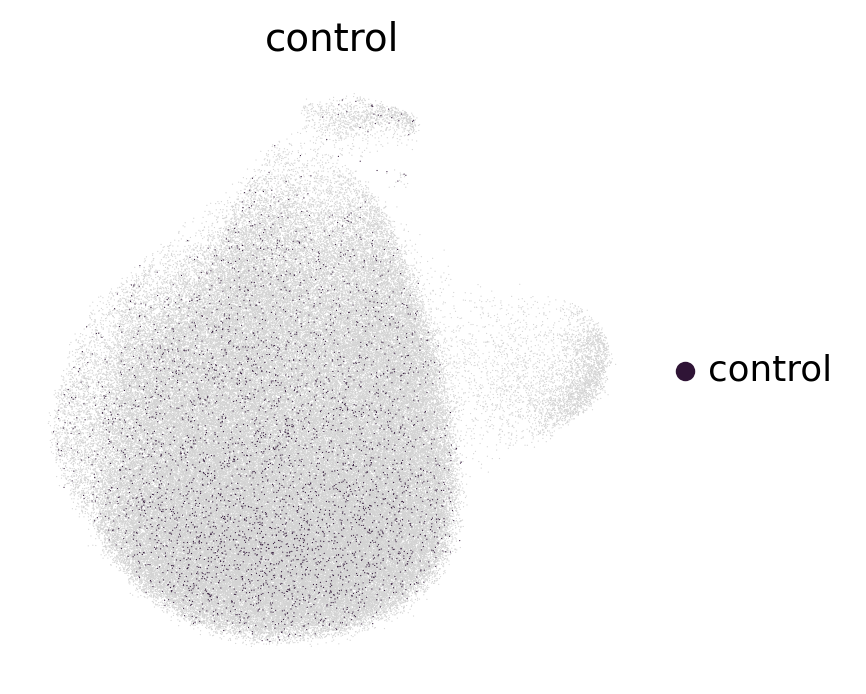

In [55]:
plot(adata, 'dose_value')

In [57]:
cell_line = 'MCF7'
adata = pt.data.srivatsan_2020_sciplex3()
adata = process_sciplex(adata, cell_line)

In [59]:
%%time
scanpy_setup(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

CPU times: user 21min 19s, sys: 12min 52s, total: 34min 12s
Wall time: 6min 40s


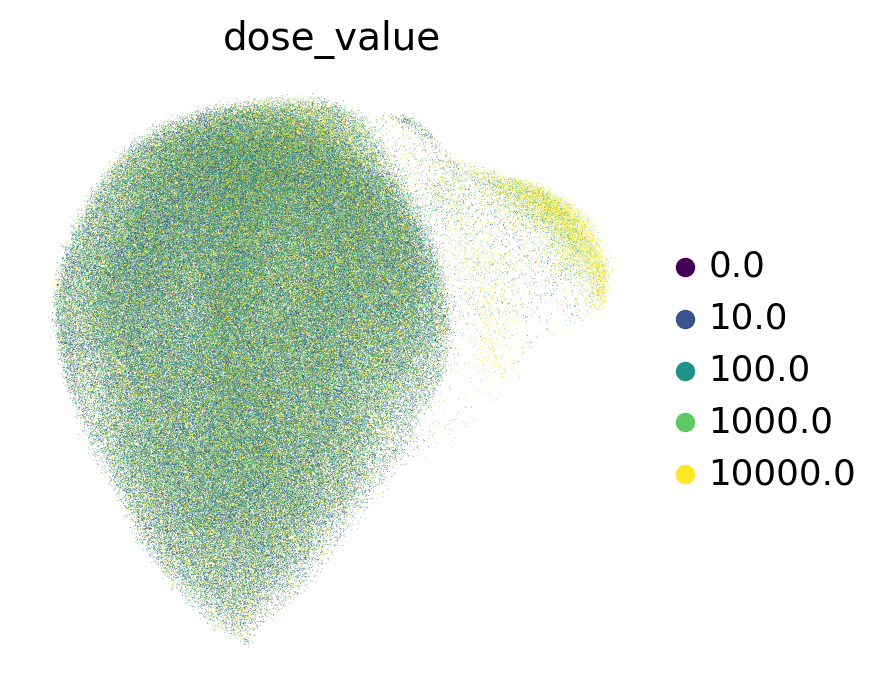

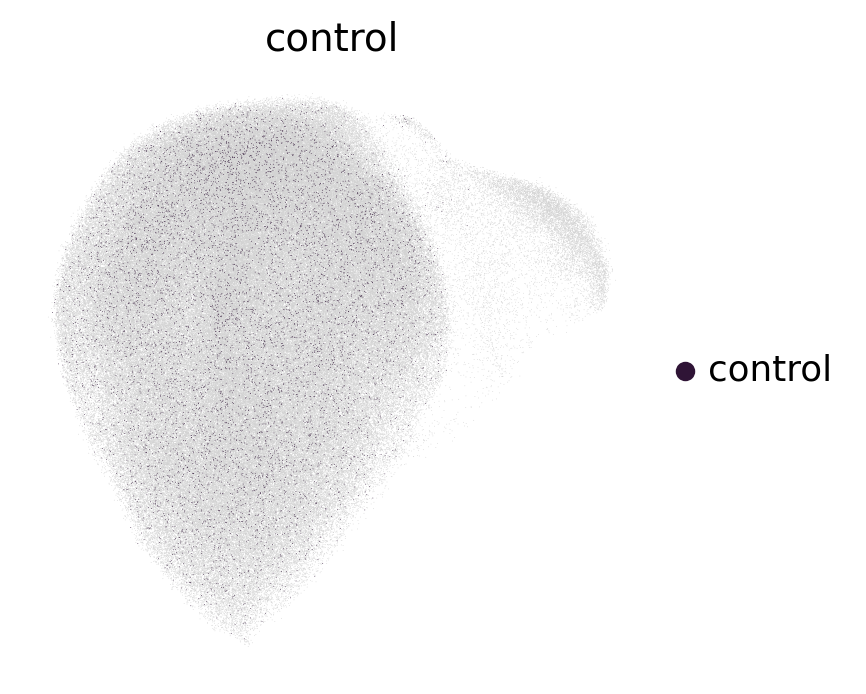

In [60]:
plot(adata, 'dose_value')

## schiebinger_2019_18day

In [61]:
adata = pt.data.schiebinger_2019_18day()

In [62]:
# take only the Dox and control conditions, representing full, "normal" reprogramming
adata = adata[adata.obs.perturbation.isin(['control', 'Dox']) & (~adata.obs.age.isin(['iPSC', 'D0', 'D0.5']))]
adata.obs['perturbation_old'] = adata.obs.perturbation
adata.obs['perturbation'] = adata.obs.age.replace({'D1':'control'})

adata.obs.perturbation.value_counts()

D8         11088
D2          9670
D4          8962
D6          8422
D3.5        8066
D5          7227
D4.5        7127
D2.5        6916
D3          6821
D5.5        6550
D7          6507
D7.5        5061
D15.5       4851
D16.5       4660
D17.5       4069
D15         3923
D18         3800
D14         3758
control     3735
D17         3678
D8.5        3573
D16         3442
D6.5        3111
D9          3079
D14.5       2723
D11         2612
D12         2429
D10         2419
D13.5       2373
D9.5        2297
D12.5       2253
D11.5       2242
D13         2146
D10.5       1986
D1.5        1956
Name: perturbation, dtype: int64

Plot an overview of the data.

In [63]:
scanpy_setup(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

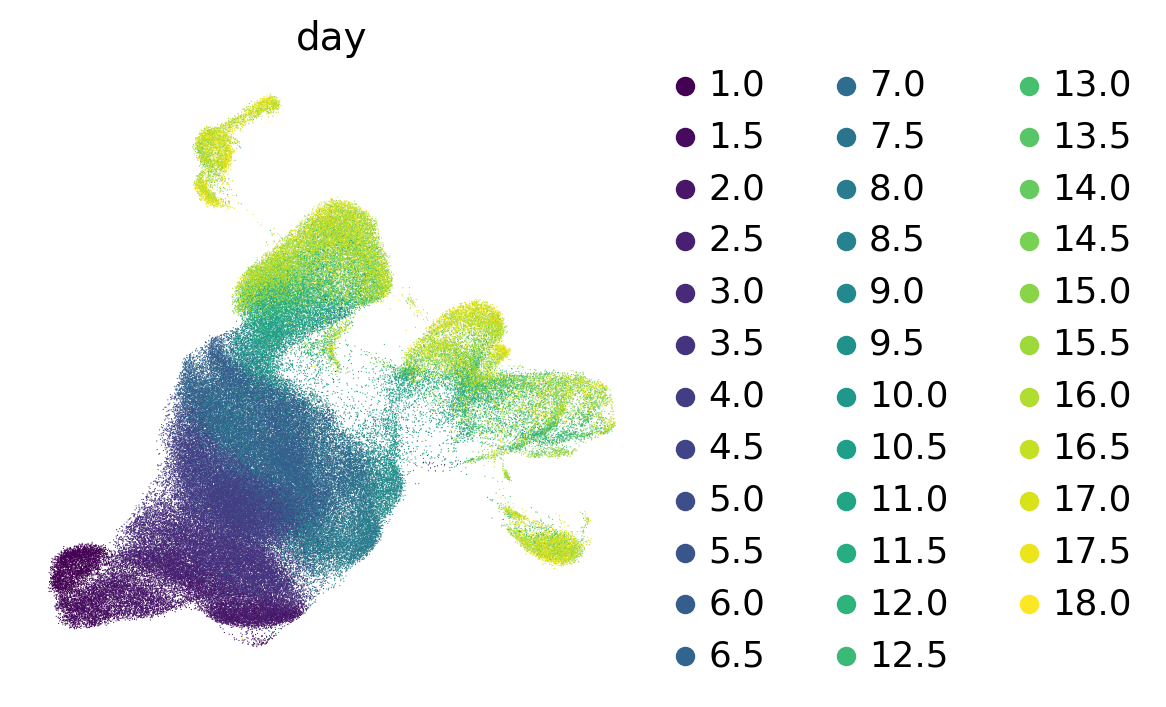

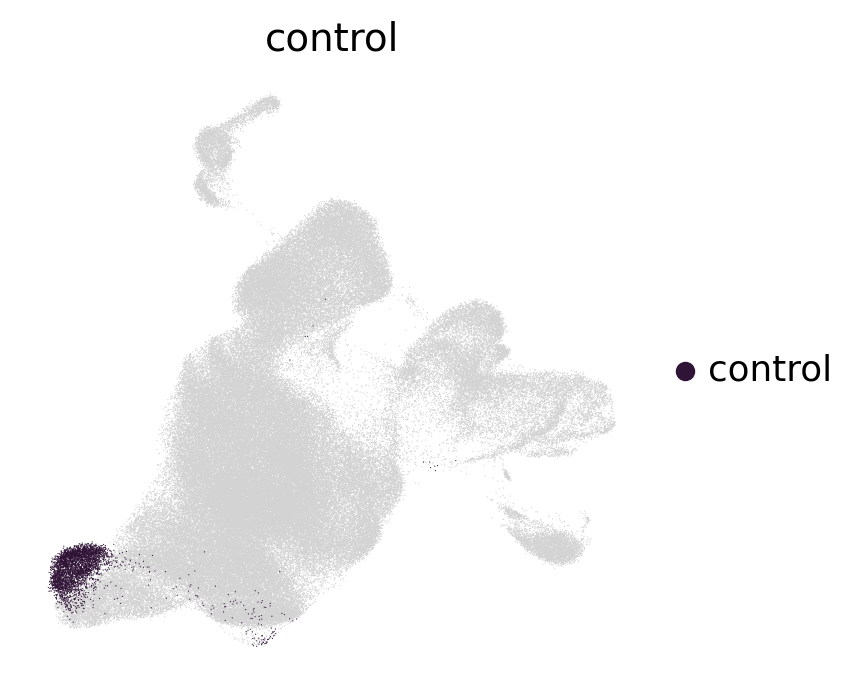

In [64]:
adata.obs['day'] = [float(x[1:]) for x in adata.obs.age]
plot(adata, 'day')

In [65]:
adata

AnnData object with n_obs × n_vars = 163532 × 27998
    obs: 'age', 'replicate', 'perturbation', 'GSM', 'cancer', 'organism', 'disease', 'tissue_type', 'perturbation_type', 'celltype', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'perturbation_old', 'day'
    var: 'ncounts', 'ncells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'day_colors', 'perturbation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

## mcfarland

In [10]:
adata = pt.data.mcfarland_2020()

# subset to common timepoints and most frequently occurring cell line - no better options
adata = adata[adata.obs.time.isin(['6', '24']) & (adata.obs.cell_line == 'COLO680N')]
adata.obs['perturbation'] = adata.obs['perturbation'].astype(str) + '_' + adata.obs.time.astype(str)
adata.obs['perturbation'] = adata.obs.perturbation.replace({'control_24':'control', 'control_6':'control'})

adata.obs.perturbation.value_counts()

control           541
Trametinib_24     378
AZD5591_24        179
Dabrafenib_24     148
Idasanutlin_24    129
Navitoclax_24     120
BRD3379_24        116
JQ1_24            115
Prexasertib_24    114
Bortezomib_24     113
Trametinib_6      112
Everolimus_24     108
Idasanutlin_6      99
Bortezomib_6       92
BRD3379_6          89
Taselisib_24       88
Afatinib_24        71
Gemcitabine_24     37
Name: perturbation, dtype: int64

In [143]:
# pd.crosstab(adata.obs.perturbation, adata[adata.obs.cell_line.isin(['LNCAPCLONEFGC', 'COV434', 'RCC10RGB', 'COLO680N', 'TEN', 'NCIH2347', 'CAOV3'])].obs.cell_line)

cell_line       CAOV3  COLO680N  COV434  LNCAPCLONEFGC  NCIH2347  RCC10RGB  \
perturbation                                                                 
AZD5591_24         72       179      37             85        92       103   
Afatinib_24        39        71      28             27        51        52   
BRD3379_24         88       116      93            102        49        99   
BRD3379_6          88        89      83            122        63        65   
Bortezomib_24      12       113      50            169        98       165   
Bortezomib_6      132        92      57            156        97       138   
Dabrafenib_24      77       148      75            136        66       112   
Everolimus_24      33       108      38             36        71        56   
Gemcitabine_24     19        37      19             25        33        11   
Idasanutlin_24    140       129      75            113       159       114   
Idasanutlin_6     103        99      61            173       120       137   
JQ1_24             73       115      40             63        83        93   
Navitoclax_24      62       120      52            109        37        91   
Prexasertib_24     36       114      24             56        37        60   
Taselisib_24       35        88      34             42        44        45   
Trametinib_24     263       378     210            305       233       373   
Trametinib_6      101       112      54            142       114       157   
control_24        177       279     162            237       222       263   
control_6         256       262     164            353       240       295   

cell_line       TEN  
perturbation         
AZD5591_24      135  
Afatinib_24      39  
BRD3379_24       67  
BRD3379_6        88  
Bortezomib_24   117  
Bortezomib_6    142  
Dabrafenib_24    89  
Everolimus_24    53  
Gemcitabine_24   22  
Idasanutlin_24  177  
Idasanutlin_6   151  
JQ1_24          120  
Navitoclax_24    48  
Prexasertib_24   42  
Taselisib_24     53  
Trametinib_24   330  
Trametinib_6    120  
control_24      241  
control_6       310

Plot an overview of the data.

In [11]:
scanpy_setup(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [ ]:
plot(adata, 'time')

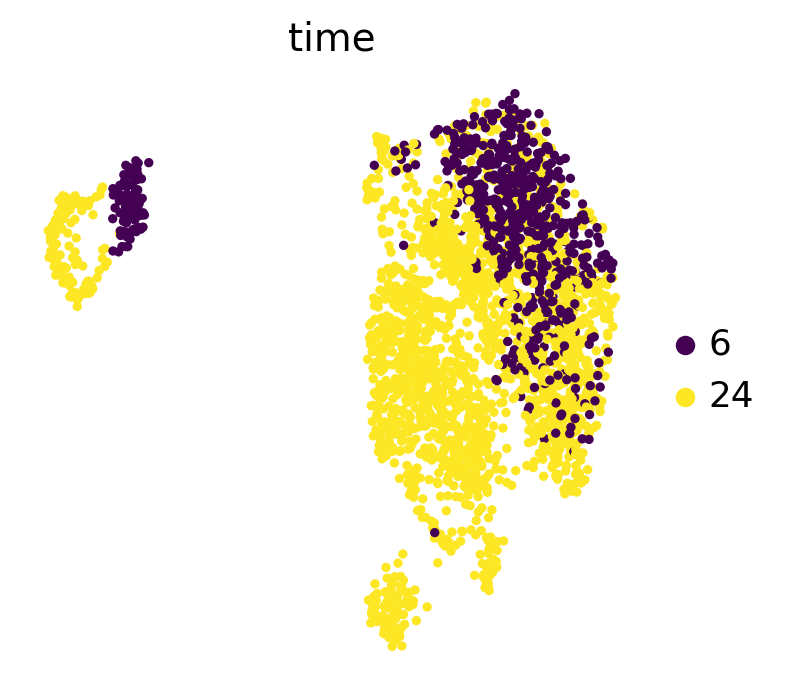

In [12]:
sc.pl.umap(adata, color=['time'], palette='viridis')

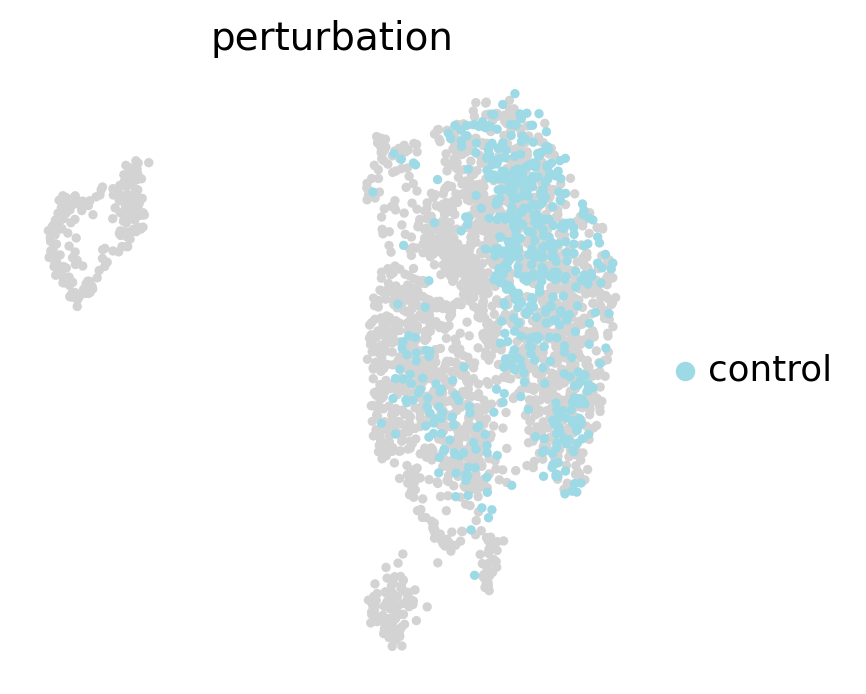

In [13]:
sc.pl.umap(adata, color='perturbation', groups=['control'], na_in_legend=False)

In [14]:
adata

AnnData object with n_obs × n_vars = 2649 × 32738
    obs: 'DepMap_ID', 'cancer', 'cell_det_rate', 'cell_line', 'cell_quality', 'channel', 'disease', 'dose_unit', 'dose_value', 'doublet_CL1', 'doublet_CL2', 'doublet_GMM_prob', 'doublet_dev_imp', 'doublet_z_margin', 'hash_assignment', 'hash_tag', 'num_SNPs', 'organism', 'percent.mito', 'perturbation', 'perturbation_type', 'sex', 'singlet_ID', 'singlet_dev', 'singlet_dev_z', 'singlet_margin', 'singlet_z_margin', 'time', 'tissue_type', 'tot_reads', 'nperts', 'ngenes', 'ncounts', 'percent_mito', 'percent_ribo', 'chembl-ID'
    var: 'ensembl_id', 'ncounts', 'ncells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'time_colors', 'perturbation_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

## norman

In [66]:
adata = pt.data.norman_2019()

In [67]:
adata.obs['perturbation'] = adata.obs.perturbation_name
adata.obs['n_guides'] = [int(s.count('+'))+1 for s in adata.obs.perturbation]

Plot an overview of the data.

In [ ]:
scanpy_setup(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [ ]:
adata.obs['n_guides'] = adata.obs['n_guides'].astype('category')

In [ ]:
plot(adata, 'n_guides')

In [ ]:
adata

## garcia

Subset to the cell type with the greatest range of timepoints when filtering for celltype-timepoint pairs with >300 cells.

In [29]:
adata = sc.read('./data/garcia2022.h5ad')

adata = adata[adata.obs.cell_type == 'Ovarian interstitial cells']
adata.obs['perturbation'] = adata.obs.age.replace({8.6:'control'}).astype(str)

In [30]:
adata.obs.perturbation.value_counts()

16.0       6872
17.0       2644
13.0       2375
21.0       2268
10.0       2194
8.8        2153
12.0       1910
control    1784
14.0       1587
9.0         548
11.0        367
18.0        339
15.0         35
19.0         11
Name: perturbation, dtype: int64

In [32]:
scanpy_setup(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

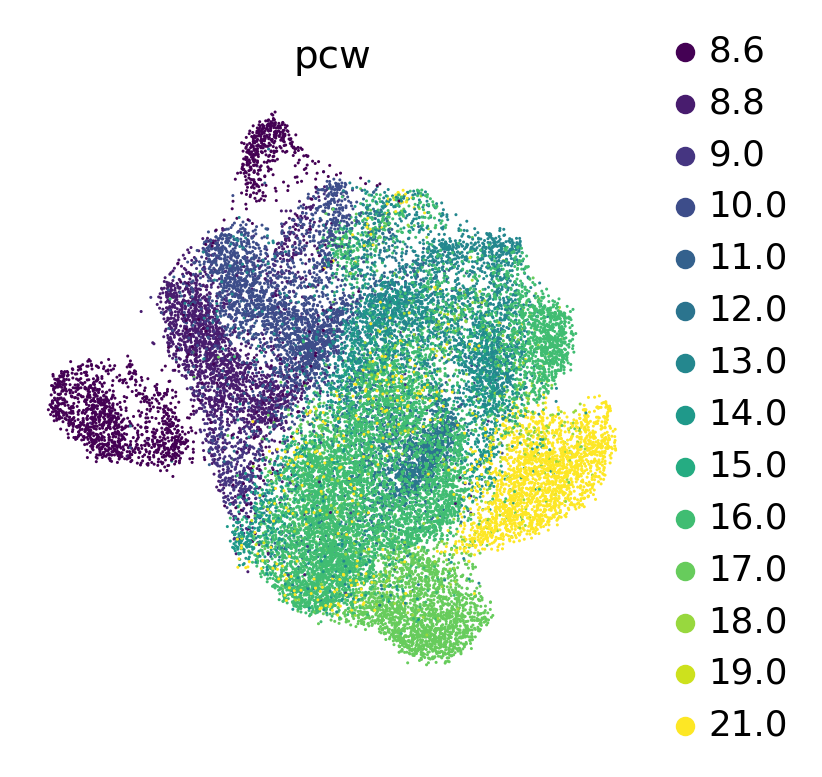

In [38]:
adata.obs['pcw'] = adata.obs['age'].astype('category')
sc.pl.umap(adata, color=['pcw'], palette='viridis')

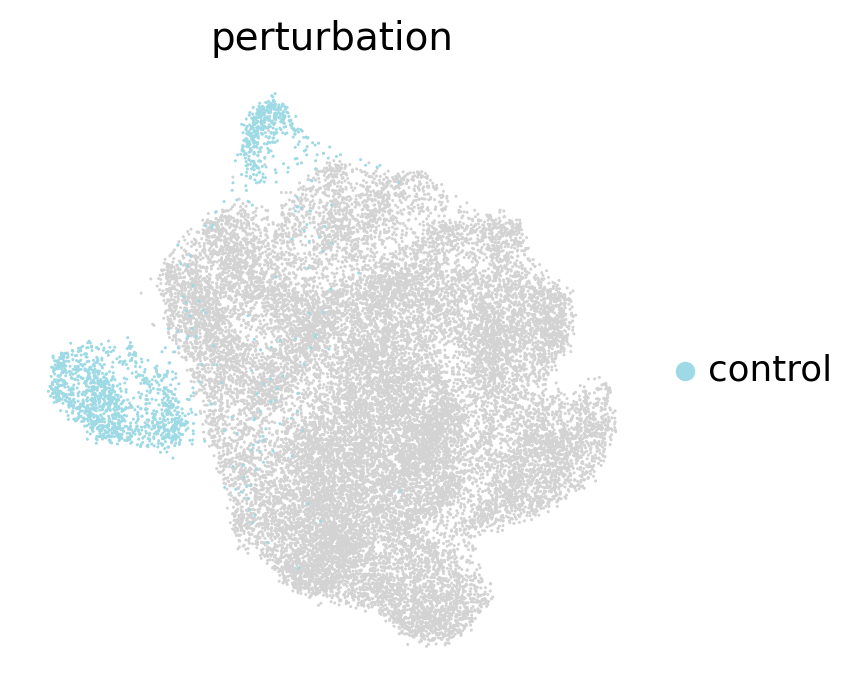

In [39]:
adata.obs['perturbation'] = adata.obs.perturbation.astype('category')
sc.pl.umap(adata, color='perturbation', groups=['control'], na_in_legend=False)

## satinha

In [182]:
adata = sc.read('./data/SantinhaPlatt2023_GSE236519_pooled_screen_CBh_temp.h5ad')
sc.pp.filter_genes(adata, min_cells=100)
adata = adata[~adata.obs.per_gene.isnull()]

included_cts = adata.obs.cell_types.value_counts()[adata.obs.cell_types.value_counts() > 1000].index
adata = adata[adata.obs.cell_types.isin(included_cts)]

adata.obs['perturbation'] = adata.obs.per_gene.replace({'Safe_H':'control'})

In [183]:
include = adata.obs.perturbation.value_counts()[adata.obs.perturbation.value_counts() > 1000].index
pd.crosstab(adata.obs.cell_types, adata.obs.perturbation)[include]

perturbation             Comt  Med15  control  Hic2  Ccdc74a  Pi4ka  Snap29  \
cell_types                                                                    
Astrocytes                229    159      149   154      124    118     121   
Interneurons_Sst_Pvalb    886    726      619   572      556    531     510   
Interneurons_Vip_Adarb2   260    182      170   171      164    159     158   
Neurons_L_2_3             821    621      648   585      585    510     514   
Neurons_L_5               597    455      474   454      392    435     395   
Neurons_L_6               475    386      309   339      263    295     270   
Oligodendrocytes          121     77       69    72       59     50      67   

perturbation             Dgcr2  Zdhhc8  Tmem191c  Lztr1  Dgcr8  Crkl  Scarf2  \
cell_types                                                                     
Astrocytes                  96     124       109    118    111   102     109   
Interneurons_Sst_Pvalb     571     538       526    504    526   504     449   
Interneurons_Vip_Adarb2    172     149       149    139    136   135     140   
Neurons_L_2_3              475     479       483    474    433   423     421   
Neurons_L_5                366     362       339    348    328   359     313   
Neurons_L_6                283     263       278    268    243   221     219   
Oligodendrocytes            65      58        57     50     50    37      49   

perturbation             Ranbp1  Rimbp3  Arvcf  Txnrd2  Slc25a1  
cell_types                                                       
Astrocytes                   93      90     86      51       85  
Interneurons_Sst_Pvalb      404     375    427     432      389  
Interneurons_Vip_Adarb2      96     124    101     104      103  
Neurons_L_2_3               397     391    336     262      271  
Neurons_L_5                 284     299    292     273      259  
Neurons_L_6                 203     191    191     150      156  
Oligodendrocytes             48      47     41      35       28

In [170]:
adata

AnnData object with n_obs × n_vars = 43988 × 20842
    obs: 'Barcode', 'lane', 'nCount_RNA', 'nFeature_RNA', 'cell_name', 'cell_types', 'cell_types_broad', 'cell_types_neuro', 'gRNA_read_count', 'gRNA_umi_count', 'per_gene', 'gRNAs', 'perturbation'
    var: 'n_cells'
    obsm: 'X_pca', 'X_umap'

In [171]:
scanpy_setup(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

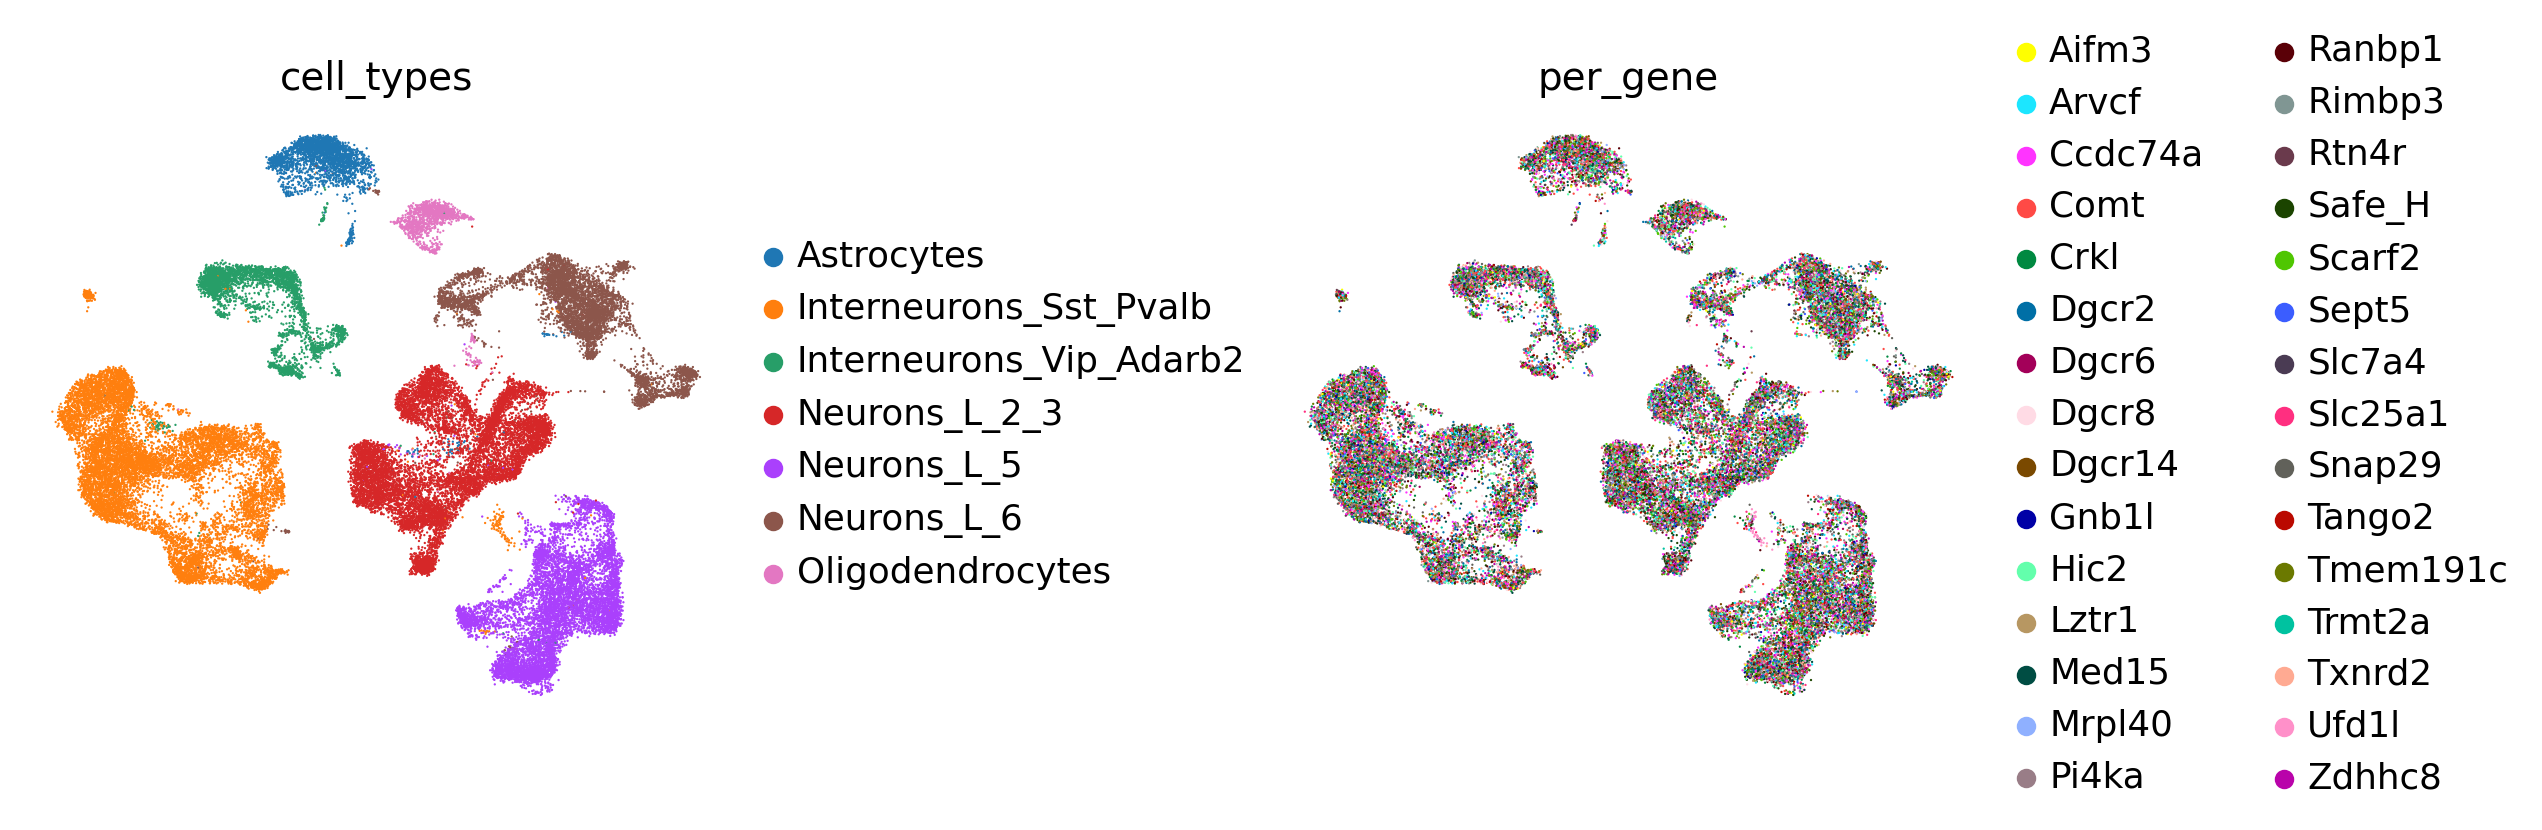

In [176]:
sc.pl.umap(adata, color=['cell_types', 'per_gene'], wspace=.6)

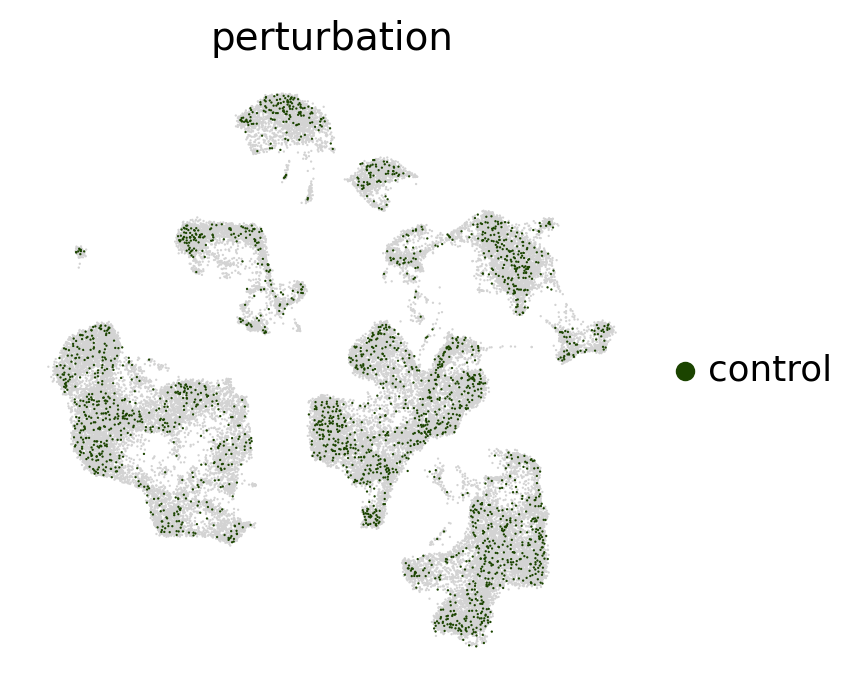

In [173]:
sc.pl.umap(adata, color='perturbation', groups=['control'], na_in_legend=False)